<a href="https://colab.research.google.com/github/hiimghosty/Projects/blob/master/Ensayo%20de%20traccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

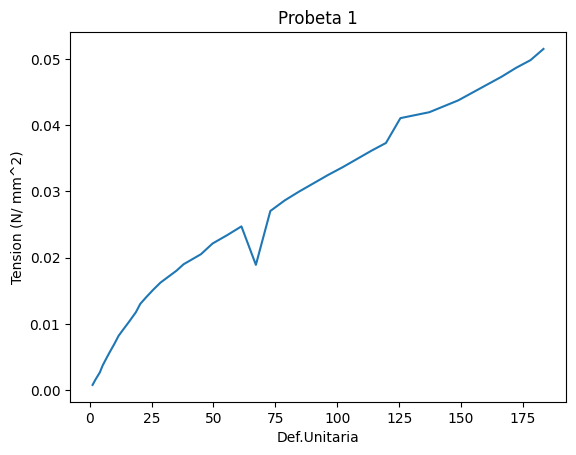

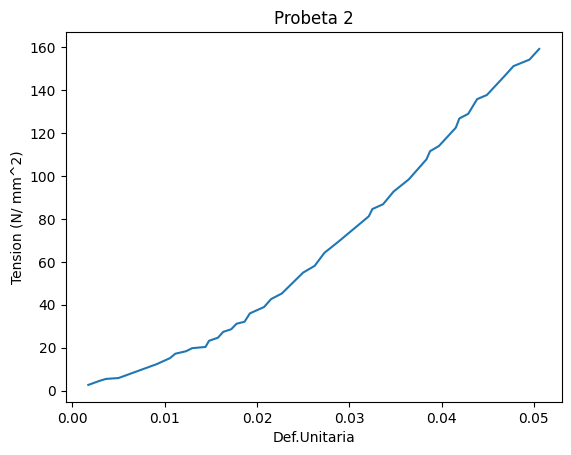

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tabla1=pd.read_csv('/content/p1.csv')

# Eliminar valores duplicados de x
x_unique, index = np.unique(tabla1['x'], return_index=True)
y_unique = tabla1['y'][index]

plt.plot(x_unique, y_unique)
plt.xlabel('Def.Unitaria')
plt.ylabel('Tension (N/ mm^2)')
plt.title('Probeta 1')

y_smooth = y_unique
x_new=x_unique

# Obtener el valor máximo y su posición
max_value = np.max(y_smooth)
max_index = np.where(y_smooth == max_value)[0][0]

# Obtener las coordenadas (x,y) del punto máximo
x_max = x_new[max_index]
y_max = max_value


plt.show()

tabla2=pd.read_csv('/content/p2.csv')

# Eliminar valores duplicados de x
x_unique, index = np.unique(tabla2['x'], return_index=True)
y_unique = tabla2['y'][index]

plt.plot(x_unique, y_unique)
plt.xlabel('Def.Unitaria')
plt.ylabel('Tension (N/ mm^2)')
plt.title('Probeta 2')

y_smooth = y_unique
x_new=x_unique

# Obtener el valor máximo y su posición
max_value = np.max(y_smooth)
max_index = np.where(y_smooth == max_value)[0][0]

# Obtener las coordenadas (x,y) del punto máximo
x_max = x_new[max_index]
y_max = max_value


plt.show()


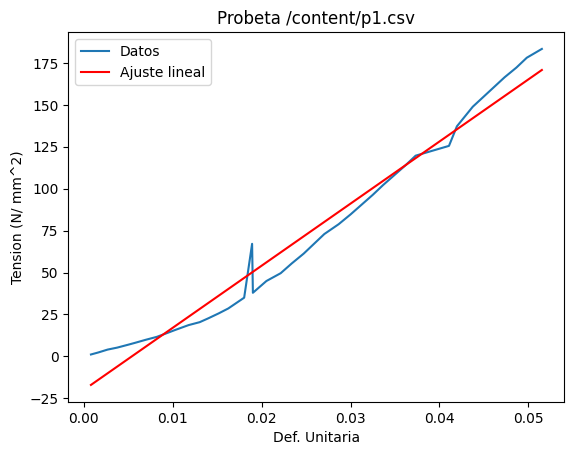

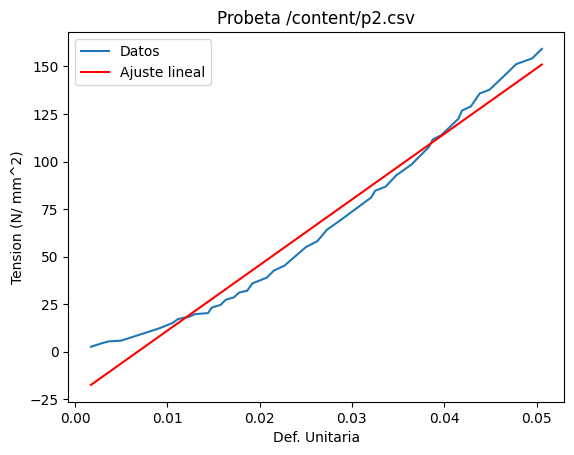

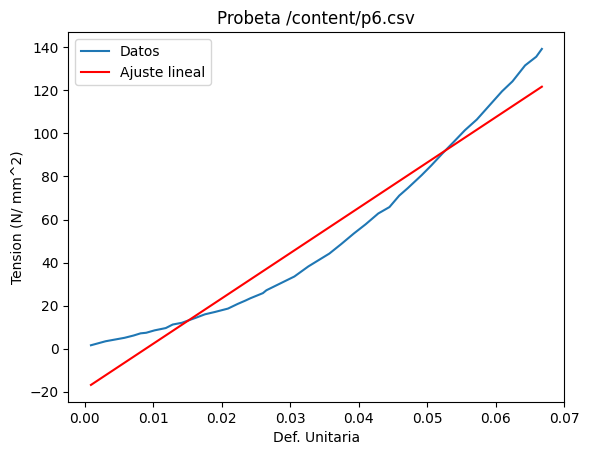

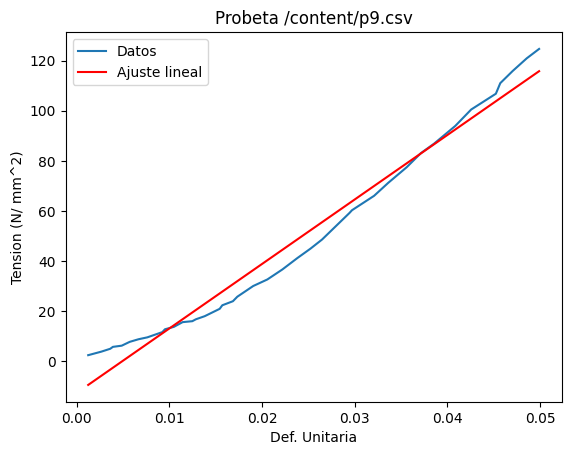

Módulos de Young calculados: [3701.613654865185, 3449.028786084354, 2104.4634160922187, 2575.2268925384883]
2957.583187395062


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Lista para almacenar los módulos de Young calculados
modulos_young = []

# Función para procesar cada tabla y calcular el módulo de Young
def procesar_tabla(ruta_csv):
    tabla = pd.read_csv(ruta_csv)

    # Eliminar valores duplicados de x (si es necesario)
    x_unique, index = np.unique(tabla['x'], return_index=True)
    y_unique = tabla['y'][index]

    # Realizar un ajuste lineal en la región elástica (asumimos comportamiento lineal)
    pendiente, b, _, _, _ = linregress(x_unique, y_unique)

    # El módulo de Young es la pendiente de la recta ajustada
    modulo_young = pendiente

    # Almacenar el módulo de Young calculado
    modulos_young.append(modulo_young)

    # Graficar los datos y la recta ajustada
    plt.plot(x_unique, y_unique, label='Datos')
    plt.plot(x_unique, pendiente * x_unique + b, label='Ajuste lineal', color='red')
    plt.xlabel('Def. Unitaria')
    plt.ylabel('Tension (N/ mm^2)')
    plt.title(f'Probeta {ruta_csv}')
    plt.legend()
    plt.show()

# Procesar cada tabla
procesar_tabla('/content/p1.csv')
procesar_tabla('/content/p2.csv')
procesar_tabla('/content/p6.csv')
procesar_tabla('/content/p9.csv')

# Valores divague
"""procesar_tabla('/content/p3.csv')
procesar_tabla('/content/p4.csv')
procesar_tabla('/content/p5.csv')
procesar_tabla('/content/p10.csv')
#procesar_tabla('/content/p8.csv') #Sale raro el grafico
procesar_tabla('/content/p7.csv') """

# Imprimir los módulos de Young calculados
print("Módulos de Young calculados:", modulos_young)
print(np.mean(modulos_young))